In [ ]:
'''
These classifiers are attractive because they have closed-form solutions that can be easily computed, 
are inherently multiclass, have proven to work well in practice and have no hyperparameters to tune.


'''

In [1]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df[[ 'b']]
X.columns=['sr0']
X.tail()starttime = datetime.now()
num_rows = X.shape[0]
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 200)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此据集完成

,sr0
2181,2
2182,11
2183,11
2184,11
2185,4


In [3]:
starttime = datetime.now()
num_rows = X.shape[0]
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 200)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此据集完成

12 seconds


In [2]:
def split_c(df_):
    # choose frequence >10 samples
    #df = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values #dataframe.as_matrix() 
    ''' why need astpye(int/str), otherwise error with y_type=object??'''
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def score_c(clf, cv=3):
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)'''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def total_f(pipe_LinearSVC, param_LinearSVC):
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values.reshape(-1)
    #dataframe.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    
    grid_=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_.fit(X_train, y_train)
    # evaluation for best parameters
    precision = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='precision_weighted')
    recall = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='recall_weighted')
    fls = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='f1_weighted')
    new = grid_.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    #print(grid_.scorer_, grid_.best_score_, grid_.cv_results_)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

In [ ]:
################    1  LinearDiscriminantAnalysis
'''
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions
'''

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.6s finished


df_R0 [10] precison: [ 0.06693665  0.0630009   0.065818  ] recall: [ 0.06596702  0.06193353  0.06534954] f1: [ 0.06587897  0.06203981  0.0652205 ]
Pipeline(steps=[('clf', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])
             precision    recall  f1-score   support

          1       0.07      0.08      0.08        25
          2       0.12      0.11      0.11        27
          3       0.04      0.05      0.04        22
          4       0.05      0.04      0.05        23
          5       0.11      0.12      0.11        25
          6       0.00      0.00      0.00        15
          7       0.04      0.04      0.04        23
          8       0.04      0.05      0.04        19
          9       0.07      0.03      0.04        37
         10       0.05      0.03      0.04        31
         11       0.00      0.00      0.00        24
         12       0.11      0.10      0.10        

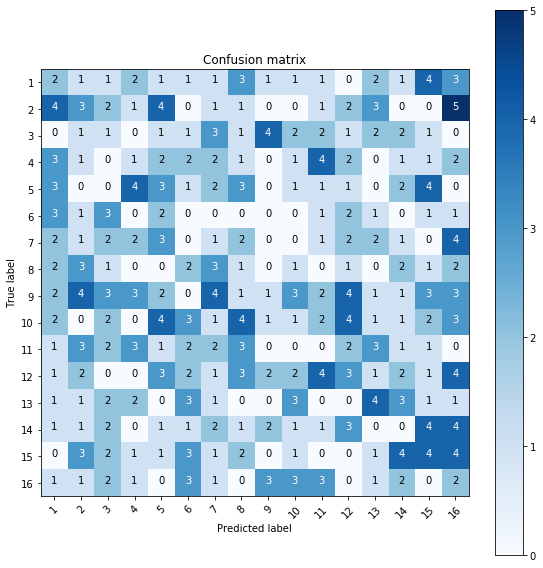

6 seconds


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

starttime = datetime.now()

pipe_LDA = Pipeline([('clf', LinearDiscriminantAnalysis())])
param_LDA = {'clf__solver': ['svd', 'lsqr', 'eigen'], #default =svd 
             #‘svd’: Singular value decomposition. Not compute the covariance matrix, so it is recommended for data with lots of features.
             #‘lsqr’: Least squares solution, can be combined with shrinkage.
             #‘eigen’: Eigenvalue decomposition, can be combined with shrinkage.
             'clf__shrinkage': [None, ], #default =None; no shrinkage
             #‘auto’: automatic shrinkage using the Ledoit-Wolf lemma.
             #float between 0 and 1: fixed shrinkage parameter.
             'clf__priors': [None, ], #default =NOne; array, optional, shape (n_classes,);  Class priors.
             'clf__n_components': [None, ], #default =None, Number of components (< n_classes - 1) for dimensionality reduction 
             'clf__store_covariance': [False, ], #default=False; Additionally compute class covariance matrix; used only in ‘svd’ solver.
             'clf__tol': [0.0001, ] #Threshold used for rank estimation in SVD solver.               
            }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_LDA, param_LDA)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2  QuadraticDiscriminantAnalysis
'''
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions
'''

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   16.1s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\

df_R0 [6] precison: [ 0.03  0.01  0.02] recall: [ 0.06  0.07  0.08] f1: [ 0.03  0.02  0.02]
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=1, random_state=14,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=None, tol=0.0001))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        25
          2       0.20      0.04      0.06        27
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        23
          5       0.04      0.12      0.06        25
          6       0.03      0.40      0.05        15
          7       0.00      0.00      0.00        23
          8       0.00      0.00      0.00        19
          9       0.00      0.00      0.00        37
         10       0.00      0.00      0.00        31
         11       0.00      0.00      0.00        24
         1

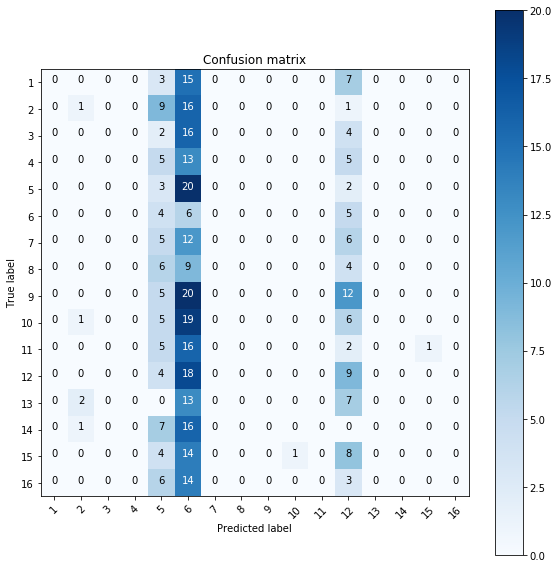

19 seconds


'\n\n'

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
starttime = datetime.now()

pipe_QDA = Pipeline(steps=[('pca', PCA(random_state=14)), ('clf', QuadraticDiscriminantAnalysis())])
param_QDA = {'pca__n_components': [None, 2, 3, 4, 5,  10, 50],
             #
             'pca__copy': [True, ],
             'pca__whiten': [False, ],
             #When True (False by default) the components_ vectors are multiplied by the square root of n_samples 
             #and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances
             #Whitening will remove some information from the transformed signal (the relative variance scales of the components) but 
             #sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.
             'pca__svd_solver': ['auto', ], #{‘auto’, ‘full’, ‘arpack’, ‘randomized’}
             #auto : the solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 
             #       and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient
             #       'randomized' method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.
             #full : run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing
             #arpack : run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. 
             #         It requires strictly 0 < n_components < X.shape[1]
             #randomized : run randomized SVD by the method of Halko et al.
             'pca__tol': [0.0, ], #float >= 0, optional (default .0) Tolerance for singular values computed by svd_solver == ‘arpack’.
             'pca__iterated_power': ['auto', ], #Number of iterations for the power method computed by svd_solver == ‘randomized’.
             'clf__priors': [None, ], #default =NOne; array, optional, shape (n_classes,);  Class priors.
             'clf__reg_param': [0.0, ], #default=0, Regularizes the covariance estimate as (1-reg_param)*Sigma + reg_param*np.eye(n_features) 
             'clf__tol': [0.0001, ], #Threshold used for rank estimation in SVD solver.               
             'clf__store_covariances': [None, ] #If True the covariance matrices are computed and stored in the self.covariance_ attribute
            }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_QDA, param_QDA)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
'''

'''